In [1]:
import numpy as np

## Задача 1 Площадь.

Допишите функцию, которая по трём точкам a, b, c вычисляет площадь 
треугольника с вершинами в этих точках. Все точки заданы радиус-векторами в n-мерном евклидовом пространстве, в виде массивов np.array.

In [8]:
def S_triangle(a, b, c):
    
    S = 1/2*np.abs(np.cross(b-a, c-a))
    return S

a = np.array([0, 0])
b = np.array([2, 0])
c = np.array([1, 2])
print(S_triangle(a,b,c))

2.0


## Задача 2  В треугольнике.

Допишите функцию, которая по трём точкам `a`, `b`, `c` и точке `x` проверяет, лежит ли `x` в треугольнике с вершинами `a`, `b`, `c`. Все точки заданы радиус-векторами в двумерном евклидовом пространстве. Функция должна работать правильно независимо от того, подаются на вход векторы в виде списков или массивов numpy.

In [13]:
def in_triangle(x, a, b, c):
    '''Вернуть True, если x лежит в треугольнике abc, и False, если нет'''
    S_xab = S_triangle(x, a, b)
    S_xac = S_triangle(x, a, c)
    S_xbc = S_triangle(x, b, c)
    S_abc = S_triangle(a, b, c)
    if (S_xab+S_xac+S_xbc)==S_abc:
        return True
    else:
        return False

a = np.array([0, 0])
b = np.array([2, 0])
c = np.array([1, 1])
x = [0.5, 0.5]
print(in_triangle(x, a, b, c))
x = [2.5, 0.5]
print(in_triangle(x, a, b, c))

True
False


##Задача 3  Верхне-треугольная матрица и матричная экспонента.

Создайте матрицу $A$ размера $32 \times 32$, задаваемую следующей формулой:
$$
A_{i j}=-\delta_{i, j}+\delta_{i, j-1}+\delta_{i, j-2}
$$
- Найдите спектр матрицы $A$. Выведите его на экран.
- Используя функцию scipy.linalg.expm, постройте $\left\|e^{A t}\right\|_{2}$ как функцию $t$ на интервале $0 \leq t \leq 50 .$ 

##Задача 4  Прокрустово преобразование.

Прокрустово преобразование.  

Цель задания - максимально хорошо "подогнать" одну фигуру под другую трансляцией плоскости и поворотом.

Пусть $\mathbf{X}_{1}$ и $\mathbf{X}_{2}-n \times 2$ матрицы, содержащие $n \ x, y$-координат точек первой и второй фигур соответственно. Задача сводится к минимизации "прокрустова расстояния" между фигурами $min(\vec{\mu}, \mathbf{R})\left\|\mathbf{X}_{2}-\left(\mathbf{X}_{1} \mathbf{R}-\mathbf{1} \vec{\mu}^{T}\right)\right\|_{F}$, где 
$\|\mathbf{X}\|_{F}=\operatorname{tr}\left(\mathbf{X}^{T} \mathbf{X}\right)-$ норма Фробениуса, 

$\mathbf{R}-2 \times 2$ ортогональная матрица поворота, 

$\vec{\mu}$ - двумерный вектор трансляции в плоскости, 

$\mathbf{1}$ - столбец из $n$ единиц.


Пусть $\bar{x}_{1}, \bar{x}_{2}-$ двумерные векторы, содержащие среднее по каждому из двух столбцов матриц $\mathbf{X}_{1}$ и $\mathbf{X}_{2} .$ Центрируем $\mathbf{X}_{1}$ и $\mathbf{X}_{2}$ , то есть вычтем из них среднее по столбцам, и используем SVD:   

\begin{gathered}
\widetilde{\boldsymbol{X}}_{1}=\boldsymbol{X}_{\mathbf{1}}-\mathbf{1} \cdot \tilde{\mathrm{x}}_{1}^{\mathrm{T}}, \quad \widetilde{\boldsymbol{X}}_{2}=\boldsymbol{X}_{2}-\mathbf{1} \cdot \tilde{\mathrm{x}}_{2}^{\mathrm{T}}
 \\
 \widetilde{\boldsymbol{X}}_{1}^{\mathrm{T}} \widetilde{\boldsymbol{X}}_{2}=\mathbf{U D V}^{\mathrm{T}}
\end{gathered}

Тогда решение поставленной задачи даётся формулами:

$$
\vec{\mu}=\bar{x}_{2}-\mathbf{R}^{T} \bar{x}_{1}, \quad \mathbf{R}=\mathbf{U V}^{T}
$$

Используя эти формулы, напишите программу, которая подгоняет одну фигуру под другую и визуализирует результат. Координаты точек фигуры в файле signatureData2.csv .

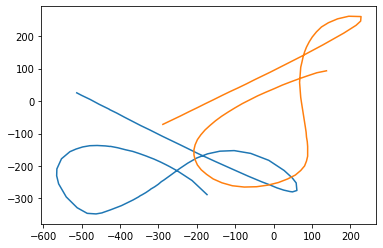

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('signatureData2.csv', delimiter=',')

x1 = np.array([np.mean(data[:, 0]), np.mean(data[:,1])])
x2 = np.array([np.mean(data[:, 2]), np.mean(data[:,3])])
X1 = np.array(data[:, 0])
Y1 = np.array(data[:, 1])
X2 = np.array(data[:, 2])
Y2 = np.array(data[:, 3])

XY1 = np.vstack((X1, Y1)).T
XY2 = np.vstack((X2, Y2)).T

plt.plot(X1, Y1)
plt.plot(X2, Y2)
plt.show()

 # здесь мог бы быть ваш код

##Задача 5  Метод Якоби.

(20) Реализуйте метод итераций для решения системы линейных уравнений (метод Якоби). Для этого перепишите уравнение $A x=b$, выделив диагональную часть матрицы $A:$
$$
A=D+(A-D) \text {, }
$$
в виде
$$
x_{n+1}=B x_{n}+c
$$
где $B=D^{-1}(D-A) .$ 

Найдите $c . $ 
Создавайте случайную матрицу с диагональным доминированием следующим способом:

n=10

A = rnd.uniform (size=(n,n))+np.diag([15]*n)

b = rnd.uniform (size=n)

Вычислите норму L2 (евклидову) соответствующей матрицы $B$ и выполните 22 итерации метода Якоби, распечатывая вектор х через каждые три итерации. В качестве начального приближения возьмите вектор из единиц. Убедитесь, что результируюший вектор $x$ действительно решает исходную систему.
Матрица $A$, с которой вы работали выше, по построению доминируется диагональю. Что произойдёт, если уменьшать величину диагональных элементов? Проверьте сходимость итераций Якоби (вычислите также норму матрицы $B$ ).

In [ ]:
import numpy as np
from numpy import linalg as LA
rnd = np.random. RandomState(1234)
n=10
A = rnd.uniform (size=(n,n))+np.diag([15]*n)
b = rnd.uniform (size=n)

 # здесь мог бы быть ваш код